In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

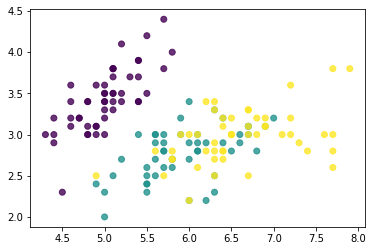

In [4]:
iris = load_iris()
Features = iris.data
target = iris.target

plt.scatter(Features[:, 0], Features[:, 1], c=target, alpha=0.8)

# Train test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
Features_train, Features_test, target_train, target_test = train_test_split(Features, target, test_size=0.2, random_state=5)

print('Train set : ' , Features_train.shape)
print('Test set ', Features_test.shape )

Train set :  (120, 4)
Test set  (30, 4)


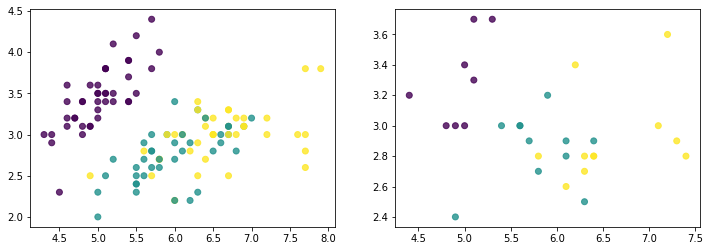

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(Features_train[:, 0], Features_train[:, 1], c=target_train, alpha=0.8)
plt.subplot(122)
plt.scatter(Features_test[:,0], Features_test[:,1], c=target_test, alpha=0.8)
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(Features_train, target_train)

print('train score :' , model.score(Features_train, target_train))
print('test score : ', model.score(Features_test, target_test))

train score : 1.0
test score :  0.9


# 2. Validation Set and Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
model = KNeighborsClassifier()
cross_val_score(model, Features_train, target_train, cv=5, scoring='accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

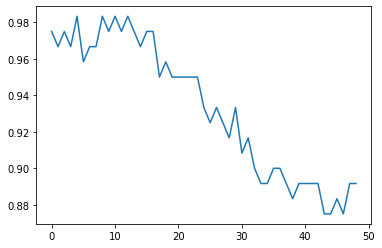

In [13]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), Features_train, target_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

# 3. Validation Curve

In [14]:
from sklearn.model_selection import validation_curve

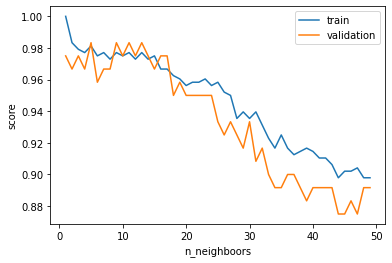

In [19]:
model = KNeighborsClassifier()
hyperparameters = np.arange(1,50)

train_score, val_score = validation_curve(model, Features_train, target_train, param_name='n_neighbors', param_range=hyperparameters, cv=5)

plt.plot(hyperparameters, train_score.mean(axis=1), label='train')
plt.plot(hyperparameters, val_score.mean(axis=1), label='validation')
plt.ylabel('score')
plt.xlabel('n_neighboors')
plt.legend()